In [24]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### ici je vais importer la dataset depuis le lien sur kaggle https://www.kaggle.com/ainslie/credit-card-data-clustering-analysis?select=CC+GENERAL.csv

In [31]:
import pandas as pd
df=pd.read_csv("assets/CC GENERAL.csv")
df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# les données contiennent des valurs NaN il faut enlever ces valeurs avec la fct dropna()

In [26]:
df_new=df.dropna()
df_new

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8943  C19184     5.871712           0.500000      20.90             20.90   
8945  C19186    28.493517           1.000000     291.12              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717  

In [27]:

del df_new['CUST_ID']

In [28]:
df_new.isnull()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       False              False      False             False   
1       False              False      False             False   
2       False              False      False             False   
4       False              False      False             False   
5       False              False      False             False   
...       ...                ...        ...               ...   
8943    False              False      False             False   
8945    False              False      False             False   
8947    False              False      False             False   
8948    False              False      False             False   
8949    False              False      False             False   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      False         False                False   
1                      False         False                False   
2                      False         False                False   
4                      False         False                False   
5                      False         False                False   
...                      ...           ...                  ...   
8943                   False         False                False   
8945                   False         False                False   
8947                   False         False                False   
8948                   False         False                False   
8949                   False         False                False   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                          False                             False   
1                          False                             False   
2                          False                             False   
4                          False                             False   
5                          False                             False   
...                          ...                               ...   
8943                       False                             False   
8945                       False                             False   
8947                       False                             False   
8948                       False                             False   
8949                       False                             False   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                      False             False          False         False   
1                      False             False          False         False   
2                      False             False          False         False   
4                      False             False          False         False   
5                      False             False          False         False   
...                      ...               ...            ...           ...   
8943                   False             False          False         False   
8945                   False             False          False         False   
8947                   False             False          False         False   
8948                   False             False          False         False   
8949                   False             False          False         False   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        False             False             False   False  
1        False             False             False   False  
2        False             False             False   False  
4        False             False             False   False  
5        False             False             False   False  
...        ...               ...               ...     ...  
8943     False             False             False   False  
8945     False             False             False   False  
8947     False             False             False   False  
8948     False      

### k-means sans normalisation

In [29]:
Cluster = KMeans(n_clusters=5)
Cluster.fit(df_new)
y_pred = Cluster.predict(df_new)

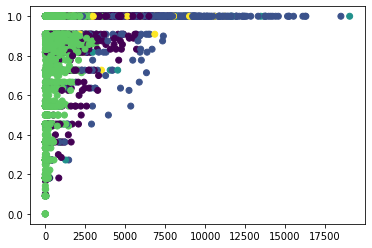

In [30]:
B=np.array(df_new)
plt.scatter(B[:, 0], B[:, 1], c=y_pred)
plt.show()

### les clusters ne sont pas bien montrés donc il faut un préprocessing avant d'appliquer l'algorithme K-mean
### k-means avec normalisation

In [6]:
def stadarise(X):
    Mean=np.mean(X)
    sigma=X.std()
    stand=(X-Mean)/sigma
    return stand
X=stadarise(df_new)


In [7]:
def normalase(X):
    Min=np.min(X)
    Max=np.max(X)
    normalize=(X-Min)/(Max-Min)
    return normalize
Z=normalase(X)
Z.shape

(8636, 17)

### Réduction des dimensions

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Z)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [9]:
principalDf

principal component 1  principal component 2
0                 -0.492046              -0.106987
1                 -0.620691              -0.030137
2                  0.291581               0.922922
3                 -0.567819               0.023027
4                  0.188140              -0.249456
...                     ...                    ...
8631              -0.563051              -0.056264
8632               0.641651              -0.439862
8633               0.357222              -0.397023
8634              -0.650113              -0.170495
8635              -0.096259               0.454804

[8636 rows x 2 columns]

In [10]:
T=np.array(principalDf)
T

array([[-0.49204622, -0.10698665],
       [-0.62069095, -0.03013663],
       [ 0.29158121,  0.92292203],
       ...,
       [ 0.35722178, -0.39702329],
       [-0.65011311, -0.17049514],
       [-0.09625919,  0.4548037 ]])

### applicons K-means sur notre dataset(2 variables)
### visulisation depuis juste 2 variables

Text(0, 0.5, 'principal component 2')

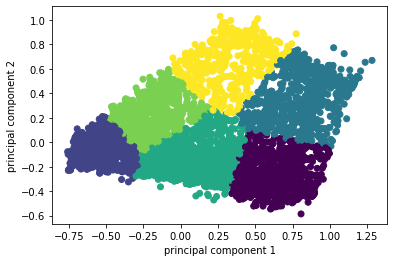

In [11]:
Cluster = KMeans(n_clusters=6)
Cluster.fit(T)
y_pred = Cluster.predict(T)
plt.scatter(T[:, 0], T[:, 1], c=y_pred)

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

### Or on ne peut pas analyser les resultats en utilisant juste 2 variables

In [12]:
df_new['Cluster']=pd.DataFrame(y_pred)
df_new[df_new['Cluster']==5]

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2     2495.148862           1.000000     773.17            773.17   
32    6732.823064           1.000000     324.95            324.95   
48     229.867179           1.000000    2390.60           1402.93   
51    1078.888565           1.000000    3107.85           2221.74   
64    1923.886805           1.000000    1887.64              0.00   
...           ...                ...        ...               ...   
8391   940.351166           0.900000       0.00              0.00   
8417  1029.713408           0.909091    1141.21            110.00   
8486    34.750769           1.000000    2562.00              0.00   
8528   126.872455           0.545455     568.50              0.00   
8588   130.041299           1.000000     581.28              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                       0.00      0.000000             1.000000   
32                      0.00   1189.533753             0.083333   
48                    987.67      0.000000             1.000000   
51                    886.11      0.000000             0.666667   
64                   1887.64   1605.949371             1.000000   
...                      ...           ...                  ...   
8391                    0.00   2045.393693             0.000000   
8417                 1031.21   1812.095991             0.833333   
8486                 2562.00      0.000000             1.000000   
8528                  568.50      0.000000             0.500000   
8588                  581.28    342.397949             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       1.000000                             0.000   
32                      0.083333                             0.000   
48                      0.666667                             1.000   
51                      0.583333                             0.500   
64                      0.000000                             1.000   
...                          ...                               ...   
8391                    0.000000                             0.000   
8417                    0.083333                             0.750   
8486                    0.000000                             1.000   
8528                    0.000000                             0.500   
8588                    0.000000                             0.875   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0             12        7500.0   
32                  0.166667                 3              3       10500.0   
48                  0.000000                 0             87        3300.0   
51                  0.000000                 0             18        2500.0   
64                  0.083333                 4             61        1850.0   
...                      ...               ...            ...           ...   
8391                0.800000                14              0        3000.0   
8417                0.333333                 5             36        3000.0   
8486                0.000000                 0             12        2300.0   
8528                0.000000                 0              6        2000.0   
8588                0.125000                 1              8        1000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
2      622.066742        627.284787          0.000000      12      5.0  
32    1720.118876       2506.745366          0.000000      12      5.0  
48    2543.953559        175.657825          0.916667      12      5.0  
51    1399.828340       1322.446601          0.000000      12      5.0  
64    3688.045998       3266.996777          0.083333      12      5.0  
...           ...               ...               ...     ...      ...  
8391   292.024227        301.379427          0.000000      10      5.0  
84

In [13]:
df_new.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12      1.0  
1  4103.032597       1072.340217          0.222222      12      1.0  
2   622.066742        627.284787          0.000000      12      5.0  
4   678.334763        244.791237          0.000000      12      3.0  
5  1400.057770       2407.246035          0.000000      12      2.0

### on va limiter à utuliser 8300 carte credit

In [14]:
new_df=df_new[:8300]

In [15]:
new_df.shape

(8300, 18)

### Maintenant nous avons notre propre dataset avec leurs cluster, passons maintenant à l'etape d'analyse 

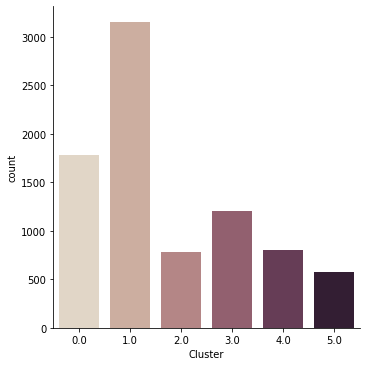

In [20]:

sns.catplot(x="Cluster", kind="count", palette="ch:.25", data=new_df)

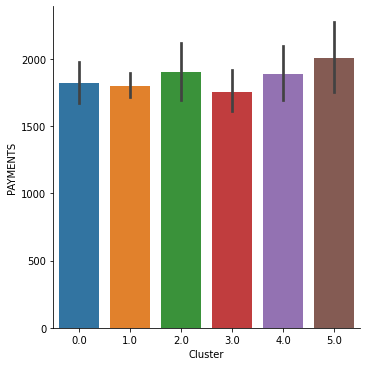

In [21]:
sns.catplot(x="Cluster", y="PAYMENTS",kind="bar",  data=new_df)

In [25]:
new_df.groupby('Cluster').mean()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0.0      1601.852528           0.901639  1120.026845        662.611379   
1.0      1585.994119           0.885782  1050.141712        634.349815   
2.0      1769.078209           0.905731  1234.798186        780.342439   
3.0      1633.431754           0.899894   989.900717        579.242216   
4.0      1744.936914           0.905980  1065.329302        625.133019   
5.0      1667.013432           0.900698  1012.781829        570.909983   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0.0                  457.485925    924.679970             0.519174   
1.0                  416.213844    959.507321             0.496724   
2.0                  454.618276   1066.742161             0.528778   
3.0                  410.816065   1005.244644             0.473419   
4.0                  440.351571   1159.078349             0.478036   
5.0                  442.615653   1031.349666             0.513663   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0.0                        0.220634                          0.393230   
1.0                        0.208500                          0.369595   
2.0                        0.233607                          0.381289   
3.0                        0.203741                          0.350115   
4.0                        0.204176                          0.359228   
5.0                        0.212704                          0.378779   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster                                                            
0.0                    0.131454          3.007453      17.262112   
1.0                    0.132581          3.162177      14.763749   
2.0                    0.139000          3.448276      16.284802   
3.0                    0.140226          3.376982      14.759036   
4.0                    0.157098          4.024433      15.630017   
5.0                    0.134548          3.326683      15.530341   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster                                                                  
0.0       4856.708075  1887.848010        772.307822          0.168837   
1.0       4503.818771  1822.231530        943.667754          0.156035   
2.0       4864.658720  1902.392968        933.247330          0.153834   
3.0       4613.827991  1800.052489        873.357720          0.152521   
4.0       4973.909250  1999.455532        885.182217          0.155242   
5.0       4464.240913  1748.068035        862.683852          0.156549   

            TENURE  
Cluster             
0.0      11.670807  
1.0      11.599888  
2.0      11.607918  
3.0      11.593849  
4.0      11.705061  
5.0      11.627598